<a href="https://colab.research.google.com/github/jahnavi1thoom/unsupervised-ml/blob/main/unsupervised_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Mall_Customers.csv'
df=pd.read_csv(path)
df.head()

Mounted at /content/drive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#preprocessing
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
import pandas as pd

# Reloading df to ensure it contains data, as it appears to be empty in the current kernel state.
df = pd.read_csv(path)
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
x=df.iloc[:,3:].values

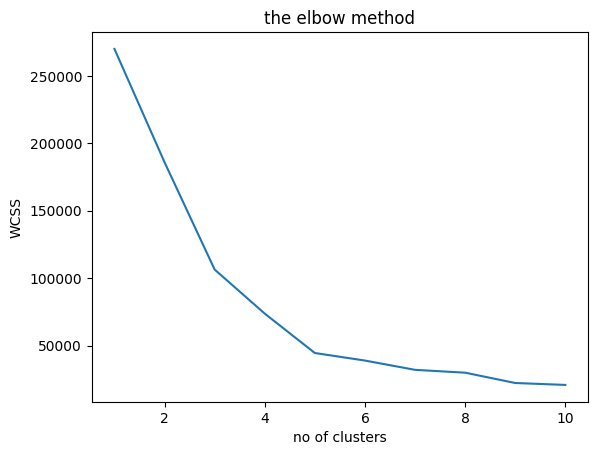

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

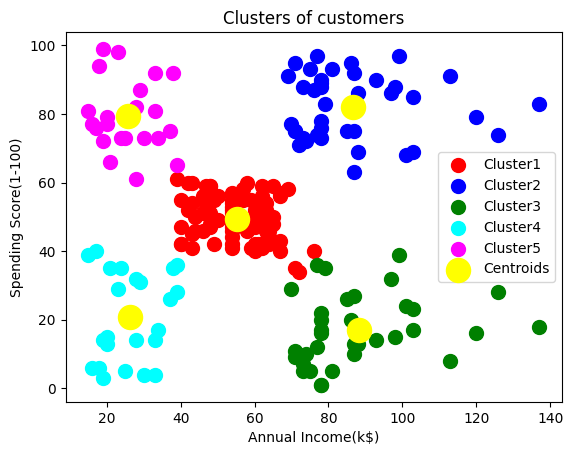

In [18]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

**ASSIGNMENT-wholeSale customers dataset**
🔹 Task 1: Data Exploration
Load the dataset and inspect all available features.
Identify which columns represent customer purchasing behavior.
Remove or ignore columns that are not directly related to spending patterns.
🔹 Task 2: Feature Selection
Select suitable numerical features that can represent customer buying habits.
Justify your feature selection briefly.
🔹 Task 3: Data Preparation
Prepare the selected data so that distance-based grouping works correctly.
Verify that all features contribute fairly to distance calculation.
🔹 Task 4: Clustering Model Construction
Build a clustering model to group customers into K segments.
Experiment with multiple values of K.
🔹 Task 5: Optimal Cluster Identification
Identify a suitable number of customer groups using an appropriate approach.
Explain why this value of K is reasonable.
🔹 Task 6: Cluster Assignment
Assign each customer to a cluster.
Add the cluster label to the dataset.
🔹 Task 7: Cluster Visualization
Visualize customer clusters using two important spending categories.
Mark cluster centers clearly in the visualization.
🔹 Task 8: Cluster Profiling
For each cluster:
Calculate average spending per category
Identify dominant purchase patterns
Summarize each cluster in business-friendly language.
🔹 Task 9: Business Insight Generation
Propose one business strategy for each customer segment, such as:
Targeted promotions
Inventory prioritization
Personalized pricing strategies
🔹 Task 10: Stability & Limitations
Rerun clustering with a different random state.
Observe whether cluster assignments change.
Mention one limitation of this clustering approach.

In [19]:
#load the dataset
from google.colab import drive
drive.mount('/content/drive')
path=('/content/drive/MyDrive/Wholesale customers data.csv')
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [23]:
#the columns which are not directly related aree romoved
df = df.drop(['Channel', 'Region'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


Selecting only spending-related numerical features provides a clean and meaningful representation of customer buying behavior, making them suitable for tasks such as customer segmentation, clustering, or pattern analysis.

In [25]:
x=df.iloc[:].values

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

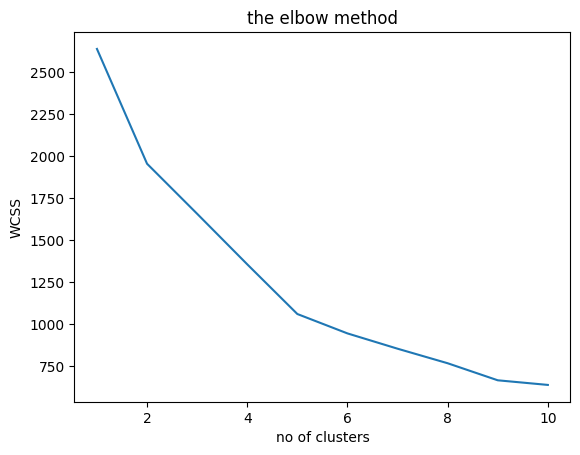

In [28]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    random_state=42,
    n_init=10
)

cluster_labels = kmeans.fit_predict(x)



In [33]:
df['Cluster'] = cluster_labels


In [34]:
df.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


In [45]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

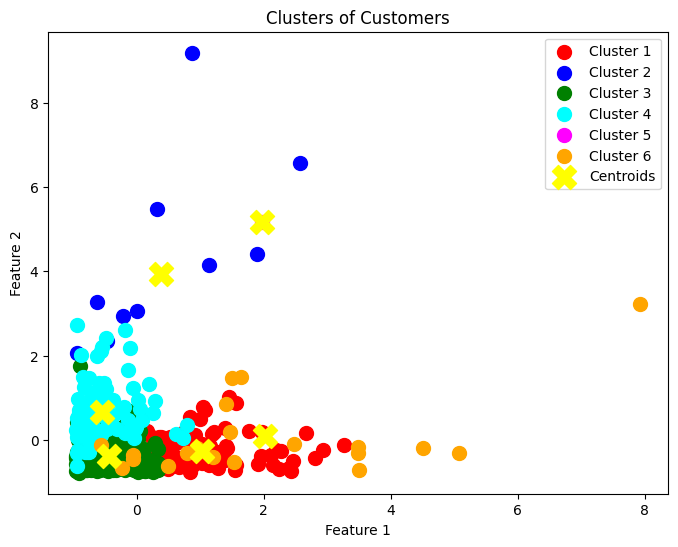

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=100, c='red', label='Cluster 1')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=100, c='blue', label='Cluster 2')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=100, c='green', label='Cluster 3')

plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],
            s=100, c='cyan', label='Cluster 4')

plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1],
            s=100, c='magenta', label='Cluster 5')

plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1],
            s=100, c='orange', label='Cluster 6')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')

plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [50]:

#Calculate Average Spending per Cluster
features = [
    'Fresh', 'Milk', 'Grocery',
    'Frozen', 'Detergents_Paper', 'Delicassen'
]

cluster_profile = df.groupby('Cluster')[features].mean()
cluster_profile


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,10440.933333,19386.422222,28656.088889,2190.244444,13327.800000,2374.200000
1,12062.913486,4115.099237,5534.966921,2940.676845,1696.170483,1299.114504
2,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000


In [48]:
cluster_profile.idxmax(axis=1)


,0
Cluster,
0,Grocery
1,Fresh
2,Frozen
